# Question 1 - Zero-padding the cross-correlation function

The cross-correlation of two functions $f(x)$ and $g(x)$ is defined as
$$(f \ast g)(y) = \int f(x)g(x + y)dx$$

Similarly to the convolution, it is straightforward to show that this can be evaluated using Fourier transforms as
$$FT(f \ast g) = FT(f)\ast\overline{FT(g)}$$
where $FT$ indicates a Fourier transform and the overbar indicates the complex conjugate.

## **a)** Proof

Imagine that we have the values of two functions $f$ and $g$ defined on a grid in $x$ with $n$ grid points. The integral defining the cross-correlation becomes a sum in this discrete case.

### **Show that there are $2n - 1$ possible values of $y$ at which $f \ast g$ can be evaluated.**

On a grid of $n$ points in $x$, $x$ can take values from $0 \rightarrow n-1$. Since $g(x - y)$ is only defined when $x - y$ is within the range of grid points for $x$, that is, when $0 \leq x - y \leq (n-1)$. This means that on one side, $y$ is bounded by the maximum value of $x$:
$$ 0 \leq x - y \\
\rightarrow 0 \leq (n - 1) - y \\
\rightarrow -(n - 1) \leq -y \\
\rightarrow (n - 1) \geq y$$

and the other side of y is bounded by the minimum value for $x$:
$$ x - y \leq (n - 1) \\
\rightarrow 0 - y \leq (n - 1) \\
\rightarrow -y \leq (n - 1) \\
\rightarrow y \geq -(n - 1)\\
$$

Therefore, the possible values for $y$ range from $-(n-1) \rightarrow (n-1)$.
$$ n - 1 - (- (n - 1)) = n - 1 - (-n + 1) = n - 1 + n - 1  = 2n - 2$$
But we must also include 0 as a possible state of y:
$$2n - 2 + 1 = 2n - 1$$
Therefore, there are $2n - 1$ possible values for $y$.

**Write a function that evaluates the sum and returns the vector containing the $2n - 1$ values of $f\ast g$.**

 In general, the value for $y$ will be determined by the value for $x$ in order to keep $x - y$ within the range of x:
$$ 0 \leq x - y\\
(0 - x) \leq -y\\
-x \leq -y\\
x \geq y\\
$$
and
$$ x - y \leq (n - 1) \\
-y \leq (n - 1 - x) \\
y \geq -(n - 1 - x) \\
y \geq (-n + 1 + x)
$$
So, in general:
$$(-n + 1 + x) \leq y \leq x$$

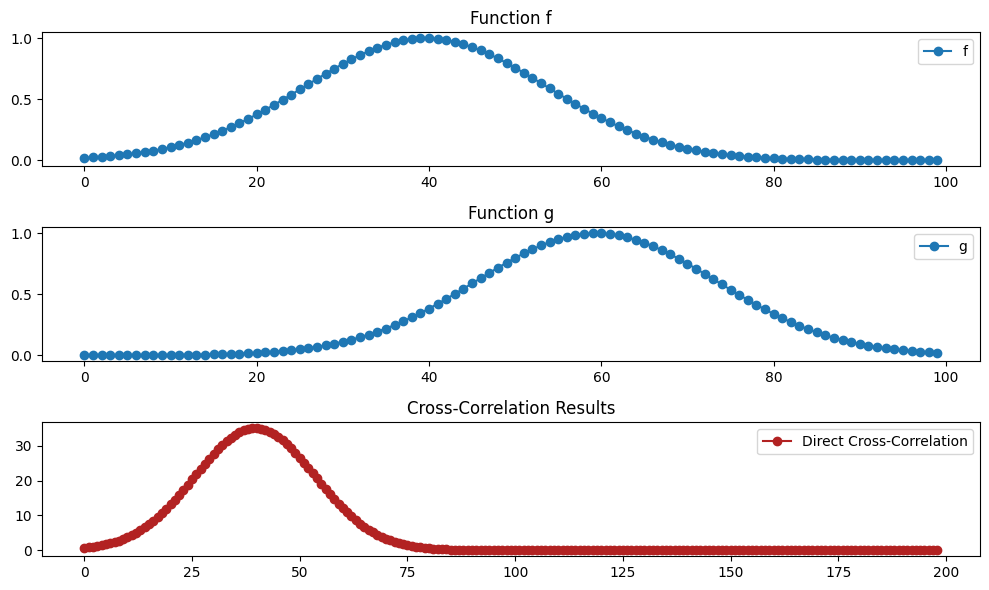

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correlation(f, g):
    '''
    This function computes the cross-correlation of two signals f and g.
    Inputs:
        f: a 1D numpy array
        g: a 1D numpy array
    Output:
        result: a 1D numpy array of length 2n - 1, where n is the length of f    
    '''
    # Initialize the parameters
    n = len(f)
    m = len(g)

    result = np.zeros(2 * n - 1)
    x_vals = np.arange(0, n) # y ranges from -(n-1) to n-1

    # Compute the cross-correlation
    for i in range(n):
        x = x_vals[i]
        sum_val = 0

        for y in range(-(n - 1 - x), x): # y ranges from (-n + 1 + x) to x to ensure x-y is in the range of [0, n)
            sum_val += f[x] * g[x - y]

        result[i] = sum_val

    return result

# Example usage:
n = 100
m = 100
f = np.exp(-(np.linspace(0, 5, n) - 2)**2)  # Gaussian function centered at 2
g = np.exp(-(np.linspace(0, 5, m) - 3)**2)  # Gaussian function centered at 3

result = cross_correlation(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result, 'o-', color = "firebrick", label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result))

## **b)** Implementation with Fourier Transforms

**Implement the cross-correlation using the Fourier transform**.

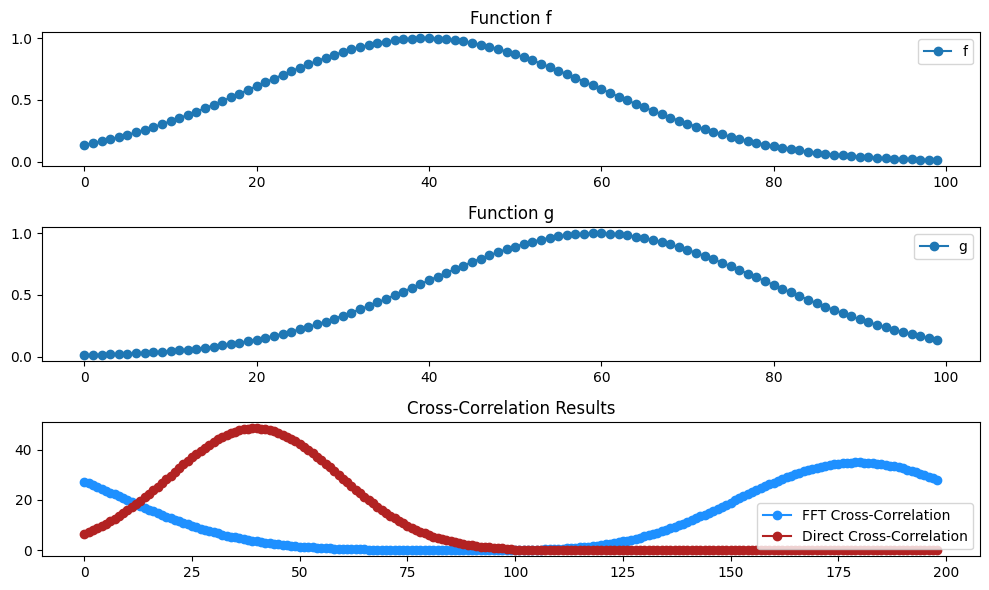

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199


In [65]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def cross_correlation_fft(f, g):
    # Zero-pad the vectors to ensure 2n-1 values in the result
    n = len(f)
    m = len(g)

    padded_length = n + m - 1 # 2n - 1

    # Compute the FFT of the padded vectors
    F_f = np.fft.fft(f, n = padded_length)
    F_g = np.fft.fft(g, n = padded_length)
    conj_F_g = np.conjugate(F_g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * conj_F_g

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100

L = 5
x = np.linspace(0, L, n)
f = gaussian(x, 1, 2, 1)  # Gaussian function centered at 2
g = gaussian(x, 1, 3, 1)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_direct = cross_correlation(f, g)

# Plotting4
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_fft, 'o-', color = "dodgerblue", label='FFT Cross-Correlation')
plt.plot(result_direct, 'o-', color = "firebrick", label='Direct Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))

## **c)** No Padding

**Repeat part b) without zero-padding the DFTs.**

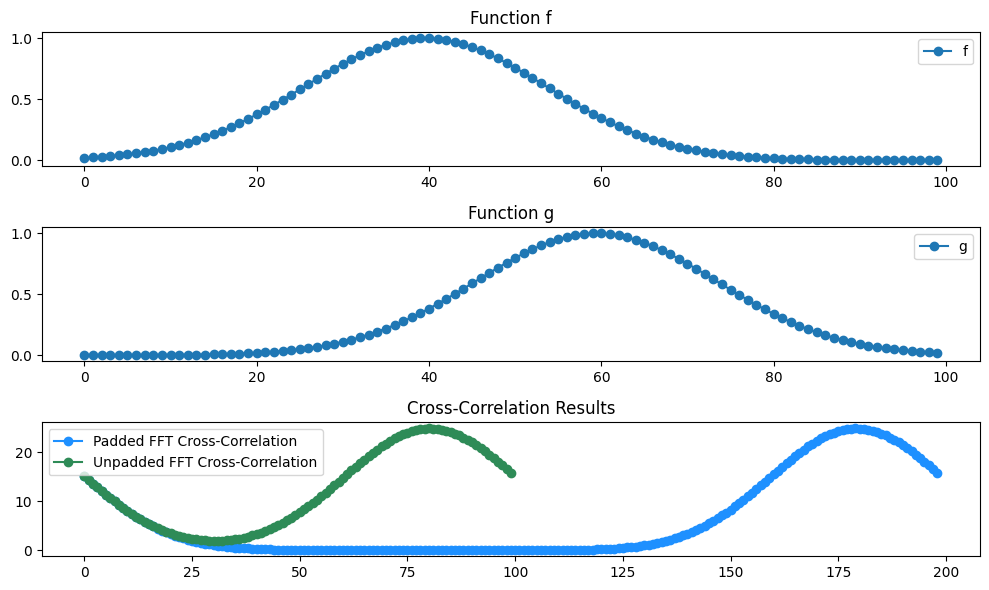

The length of f is 100, so 2n - 1 = 199
The length of the cross-correlation result is 199
The length of the circular cross-correlation result is 100


In [59]:
import numpy as np
import matplotlib.pyplot as plt

def circular_cross_correlation_fft(f, g):
    n = len(f)
    m = len(g)

    # Compute the FFT of the un-padded vectors
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)

    # Compute the product in the frequency domain
    cross_correlation_freq = F_f * np.conj(F_g)

    # Inverse FFT to get back to the time domain
    cross_correlation_time = np.fft.ifft(cross_correlation_freq)

    # Take the real part (imaginary part should be very close to zero)
    result = np.real(cross_correlation_time)

    return result

# Example usage:
n = 100
m = 100
f = np.exp(-(np.linspace(0, 5, n) - 2)**2)  # Gaussian function centered at 2
g = np.exp(-(np.linspace(0, 5, m) - 3)**2)  # Gaussian function centered at 3

result_fft = cross_correlation_fft(f, g)
result_circular_fft = circular_cross_correlation_fft(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f, 'o-', label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(g, 'o-', label='g')
plt.legend()
plt.title('Function g')

plt.subplot(3, 1, 3)
plt.plot(result_fft, 'o-', color = "dodgerblue", label='Padded FFT Cross-Correlation')
plt.plot(result_circular_fft, 'o-', color = "seagreen", label='Unpadded FFT Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(result_fft))
print('The length of the circular cross-correlation result is', len(result_circular_fft))

**What difference does it make?**

When you don't zero-pad the DFTs before computing the cross-correlation using FFT, the convolution can only compare the correlation of the functions without any shift. Normally, cross-correlation takes two signals and shifts them by one each time, calculating the correlation point-by-point for each shift. In the case of the two gaussians, they are identical and so for some shift value should match perfectly. However, if there is no padding, there is no room in the array for the two gaussians to shift left or right relative to each other, and so we only get the correlation for the original, unshifted positions.

**What part of the cross-correlation function is computed in this case?**

The cross-correlation that is computed when there is zero padding is the immediate correlation of f with g without any shifting. That is why there is only 100 points, as this is the range $0 \rightarrow n-1$ that I provided it, and it is doing a 1-to-1 correlation between the two functions.